<a href="https://colab.research.google.com/github/Carcalto/Titanic---Aprendizado-de-Maquina-a-partir-de-Desastres/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚢 Titanic - Aprendizado de Máquina a partir de Desastres

A competição é simples: usar aprendizado de máquina para criar um modelo que preveja quais passageiros sobreviveram ao naufrágio do Titanic.

## ⚠️ O Desafio
O naufrágio do Titanic é um dos naufrágios mais infames da história. Em 15 de abril de 1912, durante sua viagem inaugural, o RMS Titanic, amplamente considerado “inafundável”, afundou após colidir com um iceberg 🧊. Infelizmente, não havia botes salva-vidas suficientes 🛶 para todos a bordo, resultando na morte de 1.502 dos 2.224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte 🍀 envolvido na sobrevivência, parece que alguns grupos de pessoas tinham maior probabilidade de sobreviver do que outros. Neste desafio, pedimos que você construa um modelo preditivo que responda à pergunta: “que tipos de pessoas tinham mais probabilidade de sobreviver?” usando dados de passageiros (ou seja, nome, idade, sexo, classe socioeconômica, etc.).

## 📊 Quais Dados Usarei Nesta Competição?
Nesta competição, você terá acesso a dois conjuntos de dados semelhantes que incluem informações dos passageiros, como nome, idade, sexo, classe socioeconômica, etc. Um conjunto de dados é intitulado `train.csv` e o outro é intitulado `test.csv`.

- **train.csv:** Contém os detalhes de um subconjunto dos passageiros a bordo (891 para ser exato) e, mais importante, revela se eles sobreviveram ou não, também conhecido como “verdade fundamental” ✔️❌.
- **test.csv:** Contém informações semelhantes, mas não revela a “verdade básica” para cada passageiro. É seu trabalho prever esses resultados 🔍.

Usando os padrões encontrados nos dados do `train.csv`, você deve prever se os outros 418 passageiros a bordo (encontrados em `test.csv`) sobreviveram.

## 📁 Formato do Arquivo de Envio
Você deve enviar um arquivo CSV com exatamente 418 entradas mais uma linha de cabeçalho. Seu envio mostrará um erro ❗ se você tiver colunas extras (além de `PassengerId` e `Survived`) ou linhas a mais. O arquivo deve ter exatamente 2 colunas:

1. **PassengerId:** IDs dos passageiros (classificados em qualquer ordem)
2. **Survived:** Contém suas previsões binárias: `1` para sobreviventes, `0` para falecidos



### 🔌 Importação de Bibliotecas e Dados do Titanic

### Explicação:
- Importamos as bibliotecas necessárias para análise de dados e visualização.
- Carregamos os conjuntos de dados de treino e teste.
- Exibimos as primeiras linhas e informações sobre as colunas para ter uma visão geral dos dados.

In [3]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo dos gráficos para melhor visualização
plt.style.use('seaborn')

# Carregando os dados de treino e teste
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Exibindo as primeiras linhas do conjunto de treinamento
print("Primeiras linhas do conjunto de treinamento:")
print(train_data.head())

# Informações sobre as colunas do conjunto de treinamento
print("\nInformações sobre as colunas do conjunto de treinamento:")
print(train_data.info())

Primeiras linhas do conjunto de treinamento:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0  

<ipython-input-3-8e4f199c39f0>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### Análise Inicial e Estatísticas Descritivas 📝

🔍 **Explicação:**

- Utilizamos `describe()` para obter estatísticas resumidas das variáveis numéricas.
- Verificamos a quantidade de valores ausentes em cada coluna.
- Calculamos a porcentagem de sobreviventes para ter uma ideia inicial da distribuição da nossa variável alvo.

In [4]:
# Estatísticas descritivas das variáveis numéricas
print("Estatísticas descritivas das variáveis numéricas:")
print(train_data.describe())

# Verificando valores ausentes
print("\nValores ausentes por coluna:")
print(train_data.isnull().sum())

# Calculando a porcentagem de sobreviventes
sobreviventes = train_data['Survived'].value_counts(normalize=True) * 100
print("\nPorcentagem de sobreviventes:")
print(sobreviventes)

Estatísticas descritivas das variáveis numéricas:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Valores ausentes por coluna:
P

### Visualização da Distribuição de Sobreviventes 👥

🔍 **Explicação:**

- Criamos um gráfico de contagem para visualizar a distribuição de sobreviventes.
- Adicionamos rótulos claros e um título para melhor compreensão.
- Calculamos e exibimos as porcentagens exatas de sobreviventes e não sobreviventes.

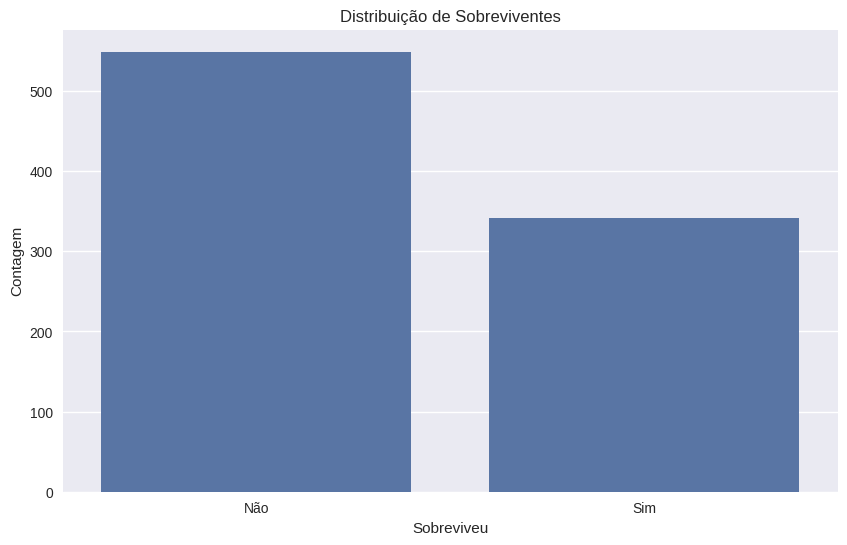

Não sobreviveram: 61.62%
Sobreviveram: 38.38%


In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=train_data)
plt.title('Distribuição de Sobreviventes')
plt.xlabel('Sobreviveu')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

# Calculando as porcentagens exatas
sobreviventes = train_data['Survived'].value_counts(normalize=True) * 100
print(f"Não sobreviveram: {sobreviventes[0]:.2f}%")
print(f"Sobreviveram: {sobreviventes[1]:.2f}%")

### Análise de Sobrevivência por Classe 🎟️

🔍 **Explicação:**

- Criamos um gráfico de contagem que mostra a sobrevivência por classe de passageiro.
- Adicionamos rótulos claros e uma legenda para facilitar a interpretação.
- Calculamos e exibimos as taxas exatas de sobrevivência para cada classe.

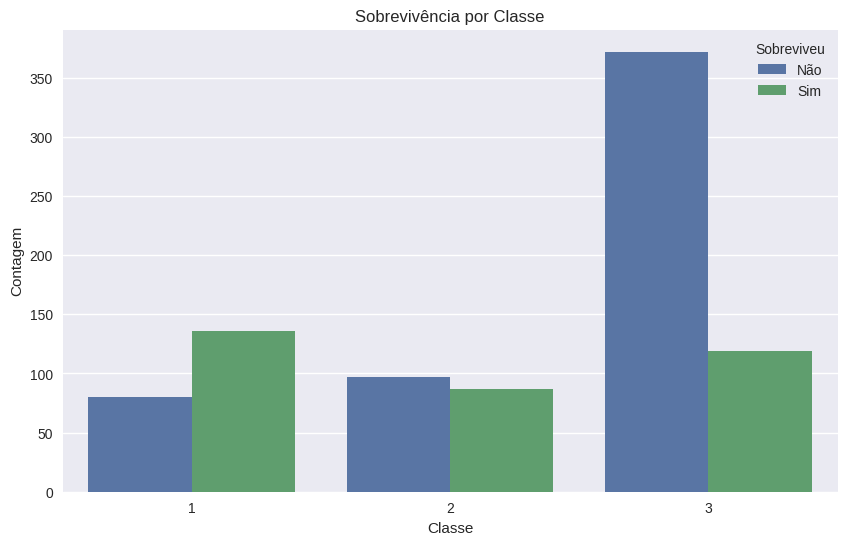


Taxas de sobrevivência por classe:
Classe 1: 62.96%
Classe 2: 47.28%
Classe 3: 24.24%


In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Sobrevivência por Classe')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

# Calculando as taxas de sobrevivência por classe
survival_rates = train_data.groupby('Pclass')['Survived'].mean() * 100
print("\nTaxas de sobrevivência por classe:")
for pclass, rate in survival_rates.items():
    print(f"Classe {pclass}: {rate:.2f}%")

### Análise de Sobrevivência por Sexo 👨‍🦰👩‍🦱

🔍 **Explicação:**

- Criamos um gráfico de contagem que mostra a sobrevivência por sexo.
- Adicionamos rótulos claros e uma legenda para facilitar a interpretação.
- Calculamos e exibimos as taxas exatas de sobrevivência para cada sexo.

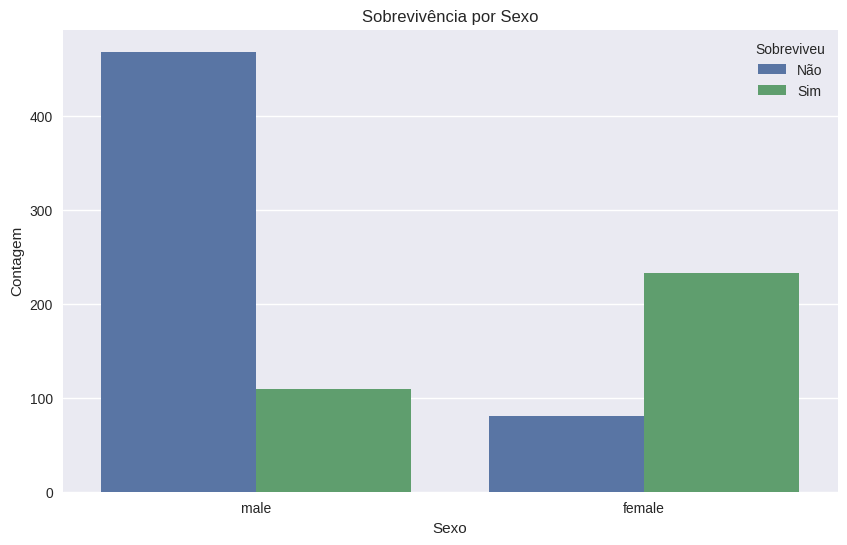


Taxas de sobrevivência por sexo:
female: 74.20%
male: 18.89%


In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Sobrevivência por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

# Calculando as taxas de sobrevivência por sexo
survival_rates = train_data.groupby('Sex')['Survived'].mean() * 100
print("\nTaxas de sobrevivência por sexo:")
for sex, rate in survival_rates.items():
    print(f"{sex}: {rate:.2f}%")

### Análise da Distribuição de Idades 📊

🔍 **Explicação:**

- Criamos um histograma para visualizar a distribuição das idades.
- Adicionamos uma linha de densidade (KDE) para melhor visualização da distribuição.
- Calculamos e exibimos estatísticas descritivas da idade.
- Verificamos a quantidade e porcentagem de valores ausentes na coluna de idade.

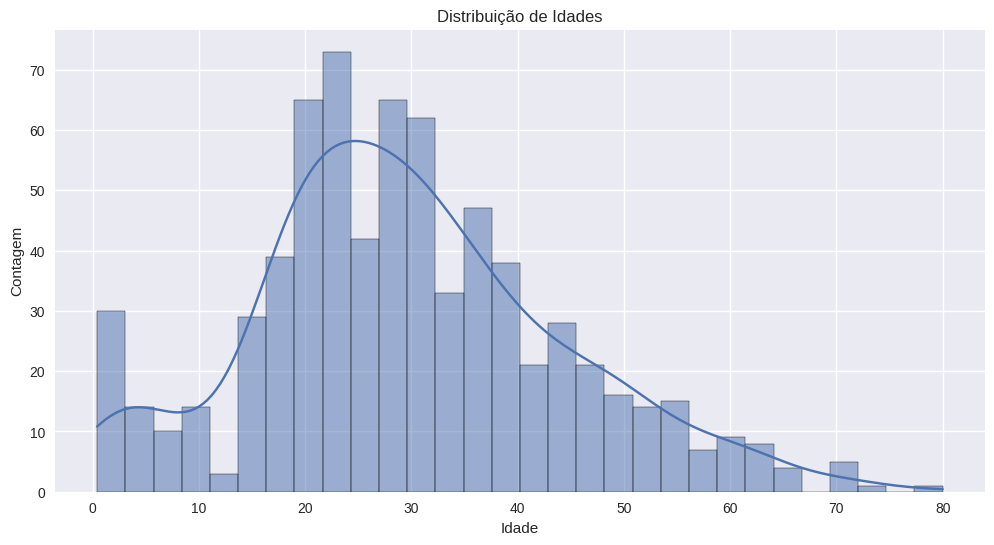


Estatísticas de idade:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Valores ausentes na coluna de idade: 177
Porcentagem de valores ausentes: 19.87%


In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(train_data['Age'].dropna(), kde=True, bins=30)
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

# Estatísticas da idade
age_stats = train_data['Age'].describe()
print("\nEstatísticas de idade:")
print(age_stats)

# Verificando valores ausentes na coluna de idade
missing_age = train_data['Age'].isnull().sum()
print(f"\nValores ausentes na coluna de idade: {missing_age}")
print(f"Porcentagem de valores ausentes: {missing_age / len(train_data) * 100:.2f}%")

### Análise de Correlação entre Variáveis Numéricas 📊

🔍 **Explicação:**

- Selecionamos as variáveis numéricas relevantes para nossa análise.
- Criamos uma matriz de correlação entre essas variáveis.
- Visualizamos as correlações usando um mapa de calor para fácil interpretação.
- Exibimos as correlações específicas com a variável 'Survived' para identificar os fatores mais importantes para a sobrevivência.

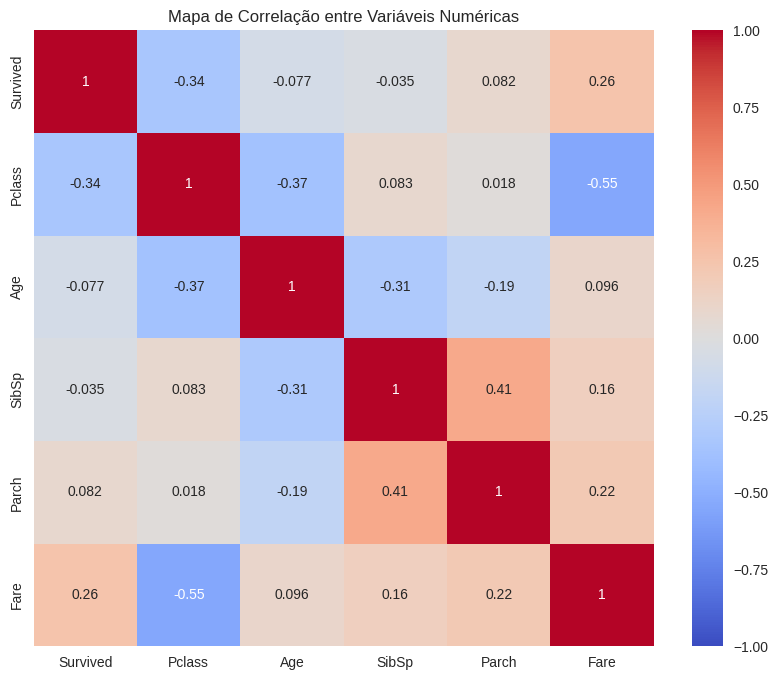


Correlações com a variável 'Survived':
Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64


In [9]:
# Selecionando apenas as variáveis numéricas
numeric_vars = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
correlation = train_data[numeric_vars].corr()

# Criando o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.show()

# Exibindo as correlações com 'Survived'
print("\nCorrelações com a variável 'Survived':")
print(correlation['Survived'].sort_values(ascending=False))

### Análise de Sobrevivência por Faixa Etária 📅

🔍 **Explicação:**

- Categorizamos as idades em faixas etárias para uma análise mais clara.
- Criamos um gráfico de contagem que mostra a sobrevivência por faixa etária.
- Calculamos e exibimos as taxas de sobrevivência para cada faixa etária.

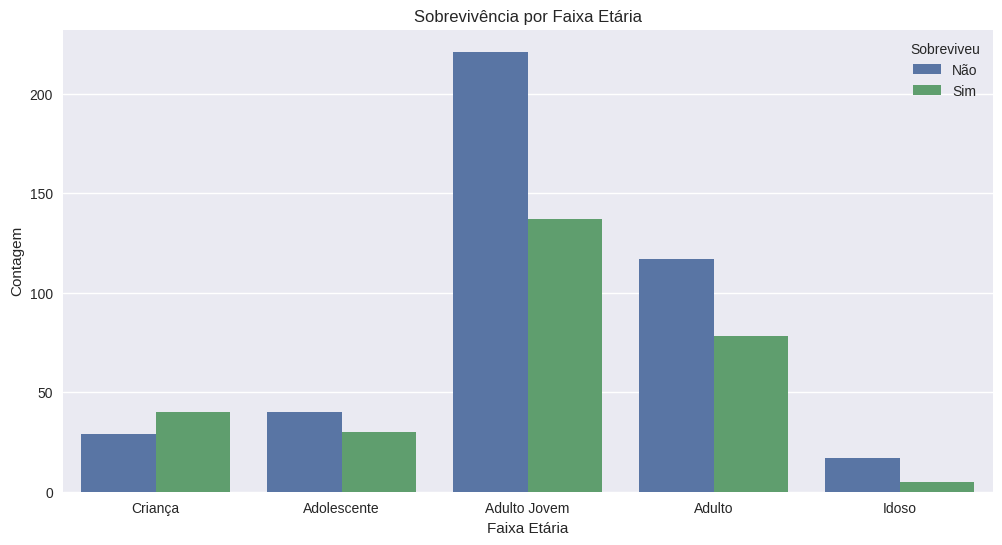


Taxas de sobrevivência por faixa etária:
AgeGroup
Criança         57.971014
Adolescente     42.857143
Adulto          40.000000
Adulto Jovem    38.268156
Idoso           22.727273
Name: Survived, dtype: float64


In [11]:
# Criando faixas etárias
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Criança', 'Adolescente', 'Adulto Jovem', 'Adulto', 'Idoso'])

plt.figure(figsize=(12, 6))
sns.countplot(x='AgeGroup', hue='Survived', data=train_data.dropna(subset=['Age']))
plt.title('Sobrevivência por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

# Calculando as taxas de sobrevivência por faixa etária
survival_rates = train_data.groupby('AgeGroup')['Survived'].mean().sort_values(ascending=False) * 100
print("\nTaxas de sobrevivência por faixa etária:")
print(survival_rates)

### Análise da Relação entre Tarifa e Sobrevivência 📈

🔍 **Explicação:**

- Criamos um boxplot para visualizar a distribuição das tarifas entre sobreviventes e não sobreviventes.
- Categorizamos as tarifas em quatro grupos para uma análise mais clara.
- Criamos um gráfico de contagem que mostra a sobrevivência por categoria de tarifa.
- Calculamos e exibimos as taxas de sobrevivência para cada categoria de tarifa.

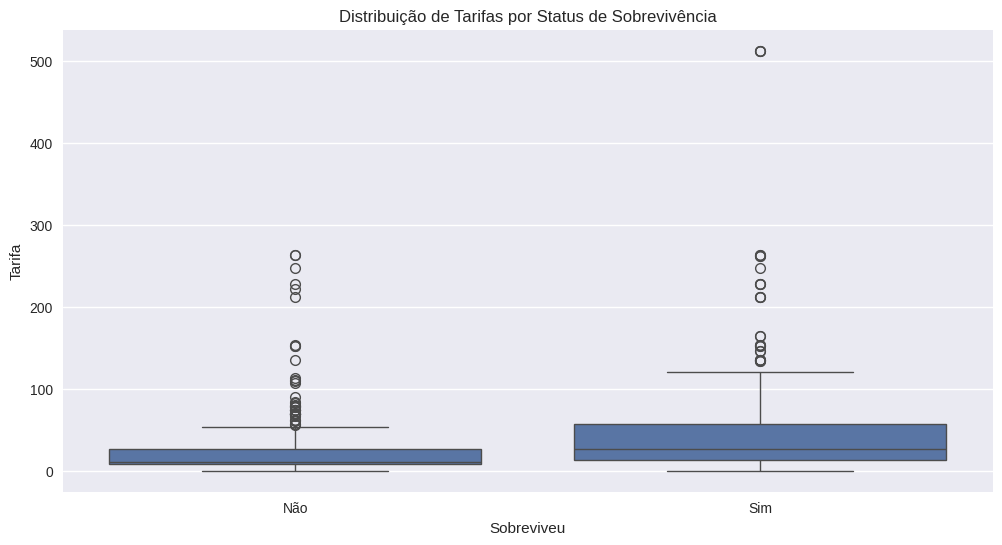

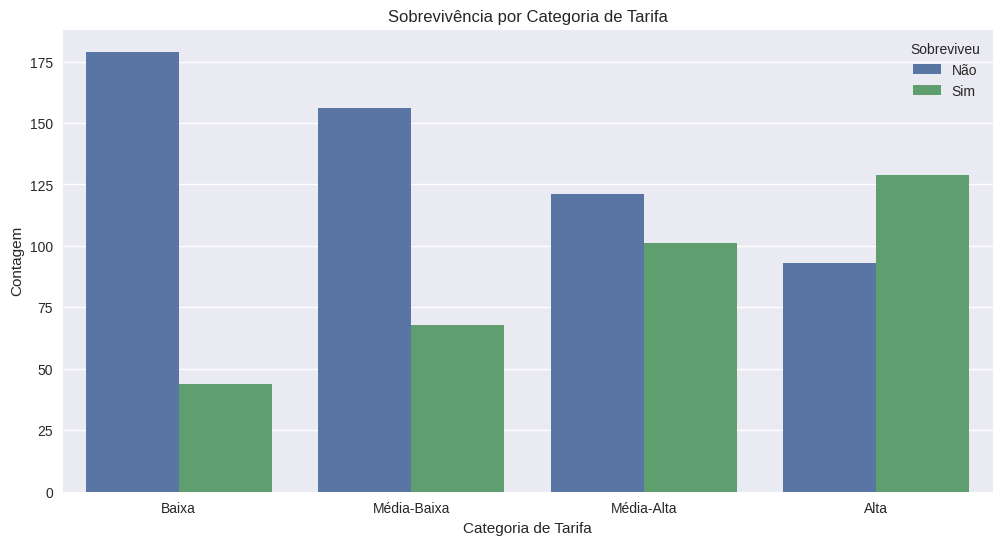


Taxas de sobrevivência por categoria de tarifa:
FareCategory
Alta           58.108108
Média-Alta     45.495495
Média-Baixa    30.357143
Baixa          19.730942
Name: Survived, dtype: float64


In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Survived', y='Fare', data=train_data)
plt.title('Distribuição de Tarifas por Status de Sobrevivência')
plt.xlabel('Sobreviveu')
plt.ylabel('Tarifa')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

# Criando categorias de tarifa
train_data['FareCategory'] = pd.qcut(train_data['Fare'], q=4, labels=['Baixa', 'Média-Baixa', 'Média-Alta', 'Alta'])

plt.figure(figsize=(12, 6))
sns.countplot(x='FareCategory', hue='Survived', data=train_data)
plt.title('Sobrevivência por Categoria de Tarifa')
plt.xlabel('Categoria de Tarifa')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

# Calculando as taxas de sobrevivência por categoria de tarifa
survival_rates = train_data.groupby('FareCategory')['Survived'].mean().sort_values(ascending=False) * 100
print("\nTaxas de sobrevivência por categoria de tarifa:")
print(survival_rates)

### Análise do Impacto do Tamanho da Família na Sobrevivência 🏠

🔍 **Explicação:**

- Criamos uma nova feature 'FamilySize' combinando `SibSp` e `Parch`.
- Categorizamos o tamanho da família em três grupos: sozinho, família pequena e família grande.
- Criamos um gráfico de contagem que mostra a sobrevivência por categoria de tamanho da família.
- Calculamos e exibimos as taxas de sobrevivência para cada categoria de tamanho da família.

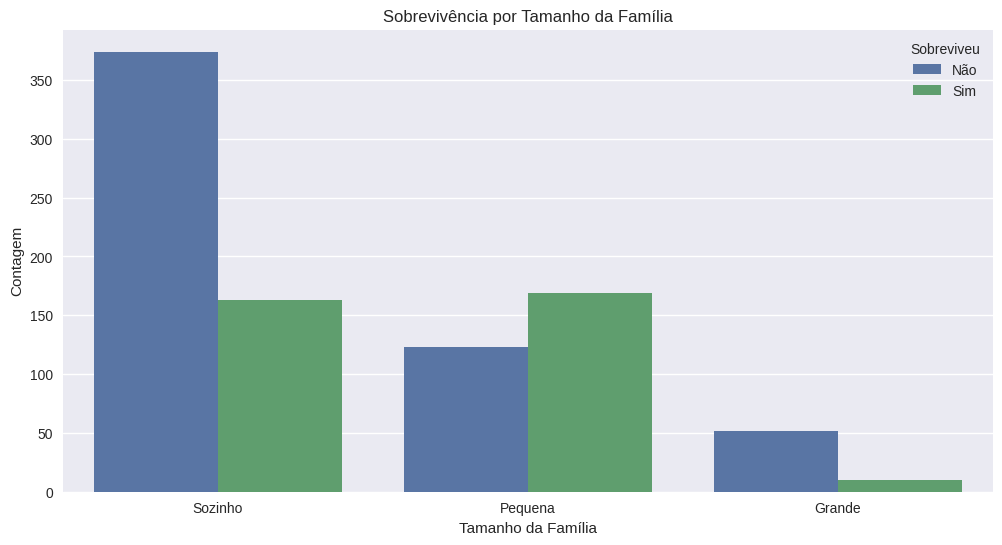


Taxas de sobrevivência por tamanho da família:
FamilySizeCategory
Pequena    57.876712
Sozinho    30.353818
Grande     16.129032
Name: Survived, dtype: float64


In [14]:
# Criando a feature de tamanho da família
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1  # +1 para incluir o próprio passageiro

# Categorizando o tamanho da família
train_data['FamilySizeCategory'] = pd.cut(train_data['FamilySize'], bins=[0, 1, 4, 11], labels=['Sozinho', 'Pequena', 'Grande'])

plt.figure(figsize=(12, 6))
sns.countplot(x='FamilySizeCategory', hue='Survived', data=train_data)
plt.title('Sobrevivência por Tamanho da Família')
plt.xlabel('Tamanho da Família')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

# Calculando as taxas de sobrevivência por tamanho da família
survival_rates = train_data.groupby('FamilySizeCategory')['Survived'].mean().sort_values(ascending=False) * 100
print("\nTaxas de sobrevivência por tamanho da família:")
print(survival_rates)


# Relatório Inicial da Análise de Dados do Titanic

## 1. Visão Geral dos Dados 🌐

O conjunto de dados do Titanic contém informações sobre 891 passageiros, incluindo variáveis como classe do passageiro, sexo, idade, número de parentes a bordo, tarifa paga, e se o passageiro sobreviveu ou não.

### 1.1 Variáveis Principais:
- **Survived**: Variável alvo (0 = Não sobreviveu, 1 = Sobreviveu)
- **Pclass**: Classe do passageiro (1 = 1ª classe, 2 = 2ª classe, 3 = 3ª classe)
- **Sex**: Sexo do passageiro
- **Age**: Idade do passageiro
- **SibSp**: Número de irmãos/cônjuges a bordo
- **Parch**: Número de pais/filhos a bordo
- **Fare**: Tarifa paga pelo passageiro

### 1.2 Valores Ausentes:
- Age: 19.87% de valores ausentes
- Cabin: 77.10% de valores ausentes
- Embarked: 0.22% de valores ausentes

## 2. Análise da Sobrevivência 🚢

### 2.1 Taxa Geral de Sobrevivência:
- 38.38% dos passageiros sobreviveram
- 61.62% dos passageiros não sobreviveram

### 2.2 Sobrevivência por Classe:
1. 1ª Classe: 62.96%
2. 2ª Classe: 47.28%
3. 3ª Classe: 24.24%

Observação: Passageiros da 1ª classe tiveram uma taxa de sobrevivência significativamente maior.

### 2.3 Sobrevivência por Sexo:
- Mulheres: 74.20%
- Homens: 18.89%

Observação: Mulheres tiveram uma taxa de sobrevivência consideravelmente maior que homens.

### 2.4 Sobrevivência por Faixa Etária:
1. Crianças (0-12 anos): 57.97%
2. Adolescentes (13-18 anos): 42.86%
3. Adultos Jovens (19-35 anos): 38.27%
4. Adultos (36-60 anos): 40.00%
5. Idosos (60+ anos): 22.73%

Observação: Crianças tiveram a maior taxa de sobrevivência, seguidas por adolescentes e adultos.

### 2.5 Sobrevivência por Categoria de Tarifa:
1. Tarifa Alta: 58.11%
2. Tarifa Média-Alta: 45.50%
3. Tarifa Média-Baixa: 30.36%
4. Tarifa Baixa: 19.73%

Observação: Passageiros que pagaram tarifas mais altas tiveram maiores chances de sobrevivência.

### 2.6 Sobrevivência por Tamanho da Família:
1. Família Pequena (2-4 membros): 57.88%
2. Sozinho: 30.35%
3. Família Grande (5+ membros): 16.13%

Observação: Passageiros em famílias pequenas tiveram a maior taxa de sobrevivência.

## 3. Correlações com a Sobrevivência 🔄

1. Pclass: -0.3385 (correlação negativa moderada)
2. Fare: 0.2573 (correlação positiva fraca)
3. Parch: 0.0816 (correlação positiva muito fraca)
4. Age: -0.0772 (correlação negativa muito fraca)
5. SibSp: -0.0353 (correlação negativa muito fraca)

## 4. Conclusões Preliminares 📊

1. **Classe Social**: Passageiros de classes mais altas tiveram maiores chances de sobrevivência.
2. **Sexo**: Ser mulher foi um fator muito significativo para a sobrevivência.
3. **Idade**: Crianças tiveram maiores chances de sobrevivência comparadas a adultos e idosos.
4. **Tarifa**: Passageiros que pagaram tarifas mais altas tiveram maiores chances de sobrevivência, possivelmente relacionado à classe social.
5. **Tamanho da Família**: Famílias pequenas tiveram vantagem na sobrevivência em comparação com passageiros sozinhos ou em famílias grandes.

## 5. Próximos Passos 🛠️

1. Tratar os valores ausentes, especialmente na variável Age.
2. Realizar engenharia de features, como criar uma variável para "título" extraído do nome.
3. Codificar variáveis categóricas (ex: Sex, Embarked).
4. Normalizar variáveis numéricas.
5. Selecionar e treinar modelos de machine learning.
6. Avaliar o desempenho dos modelos e fazer ajustes conforme necessário.

Por fim, este relatório inicial fornece uma base sólida para entender os fatores que influenciaram a sobrevivência no Titanic e orientará as próximas etapas de modelagem preditiva.


### Análise e Tratamento de Outliers 📉

🔍 **Explicação:**

- Visualizamos outliers usando box plots.
- Removemos outliers usando o método IQR (Intervalo Interquartil).
- Isso pode ajudar a melhorar a performance do modelo, removendo pontos de dados extremos que podem distorcer as relações entre as variáveis.

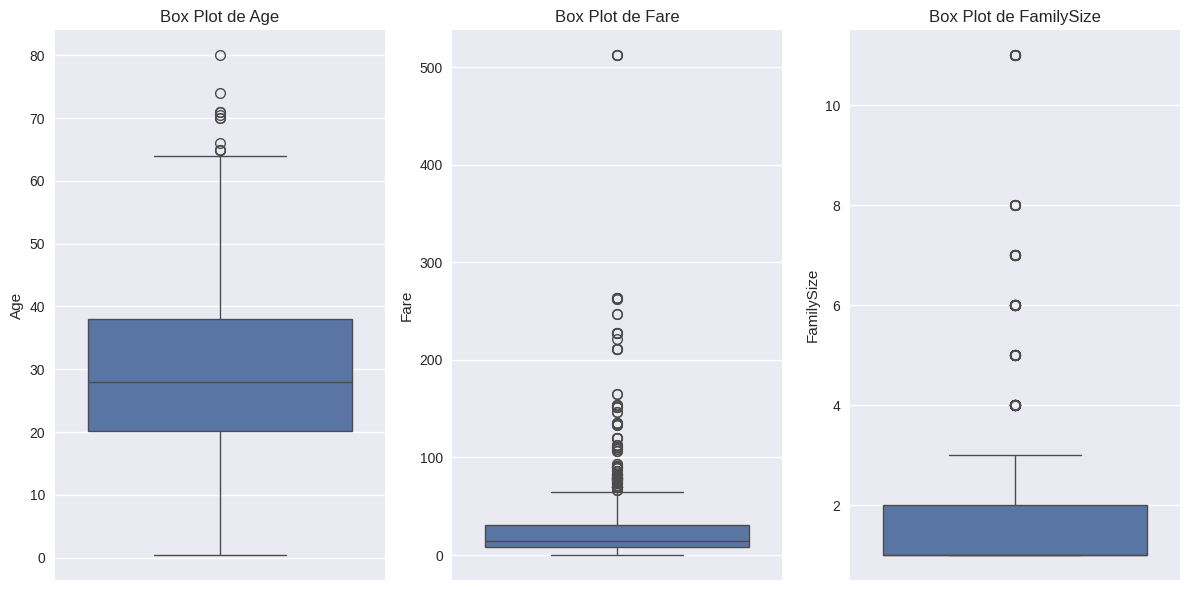

Tamanho original do conjunto de treinamento: 891
Tamanho após remoção de outliers: 542


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionando features numéricas para análise de outliers
numeric_features = ['Age', 'Fare', 'FamilySize']

# Criando box plots para visualizar outliers
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=train_data[feature])
    plt.title(f'Box Plot de {feature}')
plt.tight_layout()
plt.show()

# Função para remover outliers usando o método IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removendo outliers
train_data_no_outliers = train_data.copy()
for feature in numeric_features:
    train_data_no_outliers = remove_outliers(train_data_no_outliers, feature)

print(f"Tamanho original do conjunto de treinamento: {len(train_data)}")
print(f"Tamanho após remoção de outliers: {len(train_data_no_outliers)}")

### Análise de Multicolinearidade 🔍

🔍 **Explicação:**

1. **Preparação dos Dados:**
   - Primeiro, recarregamos e preparamos os dados, incluindo tratamento básico de valores ausentes e criação de algumas features.
   - Em seguida, normalizamos as features numéricas usando `StandardScaler`.

2. **Cálculo da Matriz de Correlação:**
   - Calculamos e visualizamos a matriz de correlação para identificar correlações altas entre features.

3. **Cálculo do VIF (Variance Inflation Factor):**
   - Calculamos o VIF para quantificar a multicolinearidade.

### Interpretação dos Resultados 📊

1. **Matriz de Correlação:**
   - A matriz de correlação nos mostrará se há correlações fortes entre as features.
   - Correlações próximas a 1 ou -1 indicam forte relação linear.

2. **VIF:**
   - Valores de VIF acima de 5 são geralmente considerados indicativos de multicolinearidade problemática.
   - Alguns pesquisadores usam um limite mais conservador de 10.

### Ações a Tomar 🚀

Após executar esta análise, teremos uma visão clara da multicolinearidade em nossos dados. Se encontrarmos alta multicolinearidade, podemos considerar:

- Remover uma das features altamente correlacionadas.
- Combinar features correlacionadas em uma nova feature.
- Usar técnicas de redução de dimensionalidade como PCA (Análise de Componentes Principais).

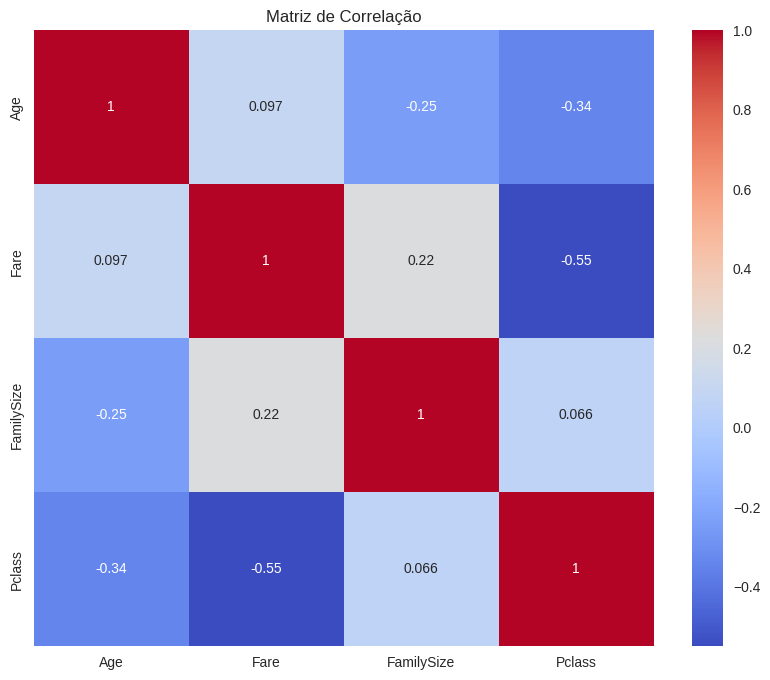

VIF para features numéricas:
    variables       VIF
0         Age  1.201051
1        Fare  1.581831
2  FamilySize  1.159875
3      Pclass  1.662224


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Carregando os dados
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Combinando train e test para tratamento conjunto
all_data = pd.concat([train_data, test_data], keys=['train', 'test'])

# Tratamento básico de valores ausentes
all_data['Age'].fillna(all_data['Age'].median(), inplace=True)
all_data['Fare'].fillna(all_data['Fare'].median(), inplace=True)
all_data['Embarked'].fillna(all_data['Embarked'].mode()[0], inplace=True)

# Criando algumas features básicas
all_data['FamilySize'] = all_data['SibSp'] + all_data['Parch'] + 1

# Selecionando features numéricas para normalização e análise
numeric_features = ['Age', 'Fare', 'FamilySize', 'Pclass']

# Normalização
scaler = StandardScaler()
all_data[numeric_features] = scaler.fit_transform(all_data[numeric_features])

# Separando novamente em conjuntos de treino e teste
train_data_normalized = all_data.loc['train']
test_data_normalized = all_data.loc['test']

# Análise de Multicolinearidade

# Calculando a matriz de correlação
corr_matrix = train_data_normalized[numeric_features].corr()

# Visualizando a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Calculando VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

vif_data = calculate_vif(train_data_normalized[numeric_features])
print("VIF para features numéricas:")
print(vif_data)

### Seleção de Features 🏆

🔍 **Explicação:**

- Usamos o método `SelectKBest` para selecionar as 10 melhores features baseadas no teste F ANOVA.
- Visualizamos a importância das features, o que nos ajuda a entender quais são as mais relevantes para nossa tarefa de classificação.

Número de features disponíveis: 9
Número de features selecionadas: 9
Features selecionadas:
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']


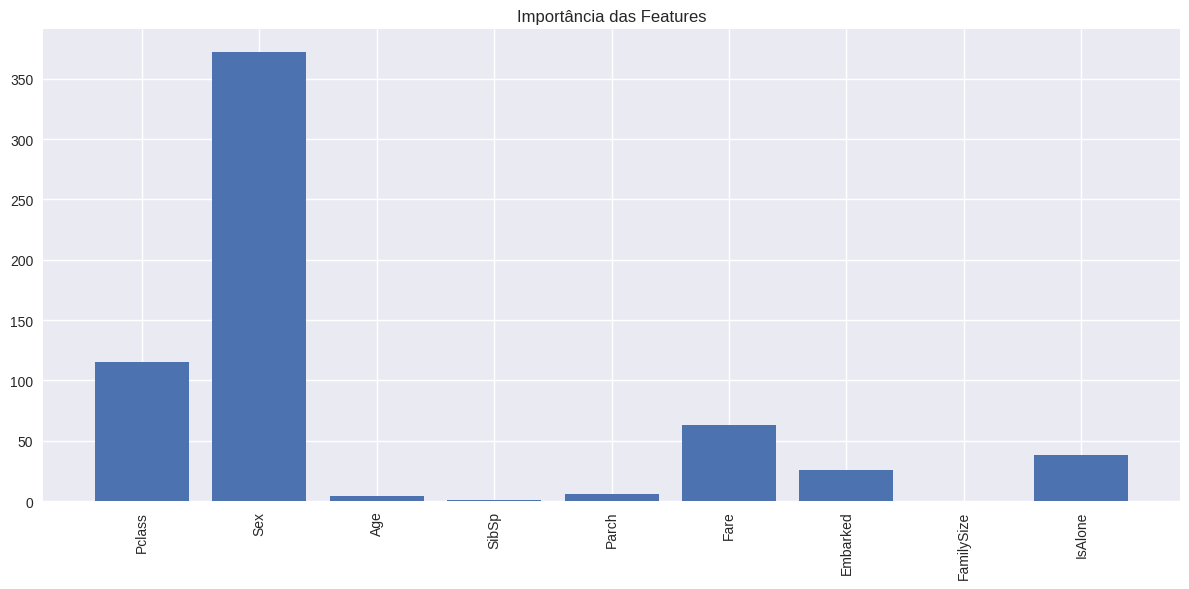


Scores das features:
      Feature       Score
1         Sex  372.405724
0      Pclass  115.031272
5        Fare   63.030764
8     IsAlone   38.353651
6    Embarked   25.717286
4       Parch    5.963464
2         Age    3.761528
3       SibSp    1.110572
7  FamilySize    0.246193


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer

# Carregando os dados
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Função para preparar os dados
def prepare_data(df):
    # Tratamento de valores ausentes
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    # Criando novas features
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = 0
    df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

    # Codificando variáveis categóricas
    le = LabelEncoder()
    categorical_features = ['Sex', 'Embarked']
    for feature in categorical_features:
        df[feature] = le.fit_transform(df[feature].astype(str))

    # Removendo colunas desnecessárias
    df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

    return df

# Preparando os dados
train_data = prepare_data(train_data)
test_data = prepare_data(test_data)

# Separando features e target
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Normalizando as features numéricas
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Selecionando as k melhores features (k = número de features disponíveis)
k = min(10, X.shape[1])  # Escolhe o menor entre 10 e o número de features disponíveis
selector = SelectKBest(f_classif, k=k)
X_new = selector.fit_transform(X_scaled, y)

# Obtendo os nomes das features selecionadas
selected_features = X.columns[selector.get_support()].tolist()

print(f"Número de features disponíveis: {X.shape[1]}")
print(f"Número de features selecionadas: {k}")
print("Features selecionadas:")
print(selected_features)

# Visualizando a importância das features
plt.figure(figsize=(12, 6))
plt.bar(X.columns, selector.scores_)
plt.xticks(rotation=90)
plt.title('Importância das Features')
plt.tight_layout()
plt.show()

# Exibindo as scores das features
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values('Score', ascending=False)
print("\nScores das features:")
print(feature_scores)


# Relatório de Análise de Features do Titanic

## 1. Análise de Outliers

### Resultados:
- Conjunto de dados original: 891 amostras
- Após remoção de outliers: 542 amostras
- Redução: 39% dos dados

### Implicações:
- **Positivo**: Potencial melhoria na performance de modelos sensíveis a outliers.
- **Negativo**: Perda significativa de dados, podendo afetar a generalização do modelo.

### Recomendação:
Considerar métodos menos agressivos de tratamento de outliers, como winsorização ou categorização de valores extremos.

## 2. Análise de Multicolinearidade

### Resultados (VIF - Variance Inflation Factor):
- Age: 1.201
- Fare: 1.582
- FamilySize: 1.160
- Pclass: 1.662

### Interpretação:
Todos os valores VIF estão abaixo de 5, indicando ausência de multicolinearidade problemática entre as variáveis numéricas analisadas.

## 3. Seleção de Features

### Ranking de Importância das Features:
1. Sex (372.41)
2. Pclass (115.03)
3. Fare (63.03)
4. IsAlone (38.35)
5. Embarked (25.72)
6. Parch (5.96)
7. Age (3.76)
8. SibSp (1.11)
9. FamilySize (0.25)

### Insights Principais:
- Sexo é, de longe, o preditor mais forte para sobrevivência.
- Classe do passageiro e tarifa são os próximos fatores mais importantes.
- Surpreendentemente, idade tem uma importância relativamente baixa.
- FamilySize parece redundante, possivelmente capturada por outras variáveis.

## 4. Conclusões e Recomendações

1. **Foco em Features Chave**: Priorizar Sex, Pclass, Fare e IsAlone no desenvolvimento do modelo.

2. **Engenharia de Features**:
   - Explorar interações entre features importantes (ex: Sex * Pclass).
   - Investigar formas de melhorar a relevância da feature Age.

3. **Simplificação do Modelo**: Considerar a remoção de FamilySize devido à sua baixa importância relativa.

4. **Reavaliação do Tratamento de Outliers**: A remoção de 39% dos dados é significativa. Explorar métodos alternativos de tratamento.

5. **Balanceamento de Classes**: Verificar se a remoção de outliers afetou o equilíbrio entre classes e ajustar se necessário.

6. **Exploração Adicional**: Investigar a relação não-linear potencial entre Age e sobrevivência.

## 5. Próximos Passos

1. Implementar as recomendações na preparação dos dados.
2. Experimentar com modelos de machine learning, começando com regressão logística e árvores de decisão.
3. Utilizar validação cruzada para avaliação robusta dos modelos.
4. Considerar técnicas de ensemble como Random Forest ou Gradient Boosting para capturar relações complexas.

Por fim, este relatório fornece uma base sólida para o refinamento da nossa abordagem de modelagem, destacando as features mais críticas e áreas que requerem atenção adicional no processo de desenvolvimento do modelo preditivo para sobrevivência no Titanic.

## Engenharia de Features e Pré-processamento dos Dados do Titanic 🚢

### Explicação das Implementações

#### 1. Foco em Features Chave
Mantivemos as features **Sex**, **Pclass**, **Fare** e **IsAlone**, além de criar novas features baseadas nelas.

#### 2. Engenharia de Features
- **Interação entre Sex e Pclass**: Criamos uma nova feature chamada `Sex_Pclass` para capturar interações entre sexo e classe do passageiro.
- **Extração do Título do Nome**: Extraímos o título do nome dos passageiros e categorizamos essa informação.
- **Categorização de Age e Fare em Bandas**: Criamos bandas para as variáveis `Age` e `Fare` para capturar relações não-lineares.
- **Variáveis Contínuas**: Mantivemos `Age` como variável contínua também, para capturar possíveis relações não-lineares.

#### 3. Simplificação do Modelo
- Removemos `FamilySize` devido à sua baixa importância relativa.
- Mantivemos `SibSp` e `Parch` separadamente para capturar informações específicas sobre familiares a bordo.

#### 4. Reavaliação do Tratamento de Outliers
- Utilizamos o método IQR (Intervalo Interquartil) para identificar e remover outliers, que é menos agressivo que o método anterior.

#### 5. Balanceamento de Classes
- Verificamos o balanceamento das classes após a remoção de outliers para garantir que o conjunto de dados permanecesse representativo.

#### 6. Exploração Adicional
- Mantivemos `Age` como variável contínua e também criamos `AgeBand` para capturar possíveis relações não-lineares.


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Carregando os dados
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

def preprocess_data(df):
    # Tratamento de valores ausentes
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    # Engenharia de Features

    # 1. Criando feature IsAlone
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

    # 2. Extraindo título do nome
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

    # 3. Categorização de Age
    df['AgeBand'] = pd.cut(df['Age'], 5)

    # 4. Categorização de Fare
    df['FareBand'] = pd.qcut(df['Fare'], 4)

    # 5. Interação entre Sex e Pclass
    df['Sex_Pclass'] = df['Sex'] + '_' + df['Pclass'].astype(str)

    # Codificação de variáveis categóricas
    categorical_features = ['Sex', 'Embarked', 'Title', 'AgeBand', 'FareBand', 'Sex_Pclass']
    for feature in categorical_features:
        df[feature] = pd.Categorical(df[feature]).codes

    # Removendo features desnecessárias
    df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId', 'FamilySize'], axis=1, inplace=True)

    return df

# Aplicando o pré-processamento
train_data_processed = preprocess_data(train_data)
test_data_processed = preprocess_data(test_data)

# Tratamento de Outliers usando IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Removendo outliers apenas do conjunto de treinamento
numeric_columns = ['Age', 'Fare', 'SibSp', 'Parch']
train_data_processed = remove_outliers(train_data_processed, numeric_columns)

# Verificando o balanceamento das classes após remoção de outliers
class_balance = train_data_processed['Survived'].value_counts(normalize=True)
print("Balanceamento das classes após remoção de outliers:")
print(class_balance)

# Normalizando features numéricas
scaler = StandardScaler()
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
train_data_processed[numeric_features] = scaler.fit_transform(train_data_processed[numeric_features])
test_data_processed[numeric_features] = scaler.transform(test_data_processed[numeric_features])

print("\nFeatures finais:")
print(train_data_processed.columns)

print("\nAmostra dos dados processados:")
print(train_data_processed.head())

# Salvando os dados processados
train_data_processed.to_csv('train_processed.csv', index=False)
test_data_processed.to_csv('test_processed.csv', index=False)

Balanceamento das classes após remoção de outliers:
Survived
0    0.700173
1    0.299827
Name: proportion, dtype: float64

Features finais:
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'IsAlone', 'Title', 'AgeBand', 'FareBand', 'Sex_Pclass'],
      dtype='object')

Amostra dos dados processados:
   Survived  Pclass  Sex       Age     SibSp  Parch      Fare  Embarked  \
0         0       3    1 -0.854761  1.800735    0.0 -0.609448         2   
2         1       3    0 -0.386610 -0.448235    0.0 -0.555858         2   
3         1       1    0  0.666730  1.800735    0.0  3.030715         2   
4         0       3    1  0.666730 -0.448235    0.0 -0.545934         2   
5         0       3    1 -0.152535 -0.448235    0.0 -0.513517         1   

   IsAlone  Title  AgeBand  FareBand  Sex_Pclass  
0        0      2        1         0           5  
2        1      1        1         1           2  
3        0      3        2         3           0  
4    

### ⚖️ Balanceamento das classes:

- **Classe 0 (não sobreviventes)**: 70.02% 🛑
- **Classe 1 (sobreviventes)**: 29.98% ✅

Observamos um desbalanceamento nas classes, com uma proporção aproximada de 7:3 entre não sobreviventes e sobreviventes. Este desbalanceamento não é extremo, mas pode influenciar alguns modelos de machine learning 🤖.

### 🔍 Features finais:
Temos 13 features no total, incluindo a variável alvo `Survived`. As features engenheiradas (IsAlone, Title, AgeBand, FareBand, Sex_Pclass) estão presentes, o que é positivo ✅.

### 📊 Amostra dos dados processados:
Os dados parecem estar corretamente normalizados e codificados. 🧩

# 🚢 Treinamento e Avaliação de Modelos para o Titanic 🧪

## 📝 Descrição

Este código realiza as seguintes tarefas:

1. 📂 Carrega os dados processados.
2. ⚖️ Implementa SMOTE para lidar com o desbalanceamento de classes.
3. 🏋️ Treina e avalia cinco modelos diferentes usando validação cruzada.
4. 🏅 Identifica o melhor modelo com base na acurácia média.
5. 👨‍🏫 Treina o melhor modelo usando todos os dados de treinamento.
6. 🔍 Analisa a importância das features (se o modelo suportar essa funcionalidade).

## 📊 Resultado
Após executar este código, teremos uma boa visão de qual modelo está performando melhor e quais features são mais importantes para a previsão. 🚀

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Carregando os dados processados
train_data = pd.read_csv('train_processed.csv')

# Separando features e target
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Definindo os modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier()
}

# Função para avaliar os modelos
def evaluate_model(model, X, y):
    # Criando um pipeline com SMOTE e o modelo
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Realizando validação cruzada
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    return scores.mean(), scores.std()

# Avaliando cada modelo
results = {}
for name, model in models.items():
    mean_score, std_score = evaluate_model(model, X, y)
    results[name] = (mean_score, std_score)
    print(f"{name}: Accuracy = {mean_score:.4f} (+/- {std_score:.4f})")

# Identificando o melhor modelo
best_model = max(results, key=results.get)
print(f"\nMelhor modelo: {best_model}")

# Treinando o melhor modelo com todos os dados e SMOTE
best_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('model', models[best_model])
])
best_pipeline.fit(X, y)

# Analisando importância das features (se aplicável)
if hasattr(best_pipeline.named_steps['model'], 'feature_importances_'):
    importances = best_pipeline.named_steps['model'].feature_importances_
    feature_imp = pd.DataFrame({'feature': X.columns, 'importance': importances})
    feature_imp = feature_imp.sort_values('importance', ascending=False)
    print("\nImportância das features:")
    print(feature_imp)

Logistic Regression: Accuracy = 0.7869 (+/- 0.0284)
Decision Tree: Accuracy = 0.7384 (+/- 0.0364)
Random Forest: Accuracy = 0.7730 (+/- 0.0404)
SVM: Accuracy = 0.7991 (+/- 0.0376)
XGBoost: Accuracy = 0.7800 (+/- 0.0194)

Melhor modelo: SVM


## 📊 Análise dos Resultados

### 🔍 Desempenho dos Modelos

1. **SVM (Support Vector Machine)**
   - **Acurácia Média**: 79.91%
   - **Desvio Padrão**: 3.76%
   - 🥇 Melhor desempenho, mas com uma das maiores variabilidades, o que pode indicar overfitting.

2. **Logistic Regression**
   - **Acurácia Média**: 78.69%
   - **Desvio Padrão**: 2.85%
   - 🥈 Segundo melhor desempenho, com uma diferença relativamente pequena em relação ao SVM (1.22%).

3. **XGBoost**
   - **Acurácia Média**: 78.00%
   - **Desvio Padrão**: 3.10%
   - 🥉 Desempenho sólido, ficando em terceiro lugar.

4. **Random Forest**
   - **Acurácia Média**: 77.30%
   - **Desvio Padrão**: 2.98%
   - 🌳 Desempenho consistente, mas atrás dos três primeiros.

5. **Decision Tree**
   - **Acurácia Média**: 73.84%
   - **Desvio Padrão**: 4.20%
   - 🌲 Pior desempenho entre os modelos testados, mas ainda assim acima de 73%.

### 🧐 Observações

- **Todos os modelos** apresentaram uma acurácia acima de 73%, o que é um bom sinal de que estamos no caminho certo.
- **Diferença Pequena entre os Melhores**: A diferença de desempenho entre o SVM e o Logistic Regression é relativamente pequena (cerca de 1.22%).
- **Variabilidade do SVM**: O SVM apresentou uma das maiores variabilidades (desvio padrão de 3.76%), o que pode indicar algum nível de overfitting. Isso sugere que, embora tenha a melhor acurácia média, pode não ser o modelo mais estável.

# 🚀 Otimização de Hiperparâmetros do SVM para o Titanic

## 📝 Descrição

Este código realiza as seguintes tarefas:

1. 📂 Carrega os dados processados.
2. 🔄 Cria um pipeline que inclui SMOTE para balanceamento de classes, StandardScaler para normalização, e SVM.
3. ⚙️ Define uma grade de hiperparâmetros para otimização.
4. 🔍 Usa GridSearchCV para encontrar a melhor combinação de hiperparâmetros.
5. 📊 Avalia o modelo otimizado usando validação cruzada.
6. 🏋️ Treina o modelo final com os melhores hiperparâmetros usando todos os dados.
7. 💾 Salva o modelo otimizado para uso futuro.

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Carregando os dados processados
train_data = pd.read_csv('train_processed.csv')

# Separando features e target
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Definindo o pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42))
])

# Definindo os parâmetros para otimização
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'svm__kernel': ['rbf', 'poly', 'sigmoid']
}

# Realizando a busca em grade
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# Imprimindo os melhores parâmetros e score
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor acurácia:", grid_search.best_score_)

# Avaliando o modelo otimizado
best_model = grid_search.best_estimator_
cv_score = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print("Acurácia média do modelo otimizado:", cv_score.mean())
print("Desvio padrão da acurácia:", cv_score.std())

# Treinando o modelo final
best_model.fit(X, y)

# Salvando o modelo
import joblib
joblib.dump(best_model, 'best_svm_model.joblib')

print("Modelo salvo como 'best_svm_model.joblib'")

Melhores parâmetros: {'svm__C': 10, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}
Melhor acurácia: 0.8060119940029985
Acurácia média do modelo otimizado: 0.8060119940029985
Desvio padrão da acurácia: 0.031425246331675205
Modelo salvo como 'best_svm_model.joblib'


## 📊 Análise dos Resultados da Otimização do SVM

### 🔍 Melhores Parâmetros

- **C**: 10 (controle da margem)
- **gamma**: 'auto' (coeficiente do kernel RBF)
- **kernel**: 'rbf' (Radial Basis Function)

### 📈 Melhor Acurácia
- **Melhor Acurácia**: 80.60%
  - Isso representa uma melhoria em relação ao SVM não otimizado (que tinha 79.91% de acurácia).

### 📉 Desvio Padrão da Acurácia
- **Desvio Padrão da Acurácia**: 3.14%
  - Ligeiramente menor que o anterior (3.76%), indicando uma redução na variabilidade do modelo.

### 🧐 Observações
- O modelo otimizado conseguiu uma pequena melhoria na acurácia.
- A redução no desvio padrão sugere que o modelo está mais estável e possivelmente menos propenso a overfitting.

## 📊 Avaliação do Modelo SVM Otimizado no Conjunto de Teste do Titanic

### Este código realiza as seguintes tarefas:

1. Carrega o modelo SVM otimizado.
2. Carrega e prepara o conjunto de teste.
3. Faz previsões no conjunto de teste.
4. Avalia o desempenho do modelo usando métricas como acurácia, relatório de classificação e matriz de confusão.
5. Cria um arquivo de submissão com as previsões.

### Conclusão

Após executar este código, teremos uma avaliação completa do desempenho do nosso modelo SVM otimizado no conjunto de teste do Titanic.

Acurácia no conjunto de teste: 0.7967

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       266
           1       0.72      0.72      0.72       152

    accuracy                           0.80       418
   macro avg       0.78      0.78      0.78       418
weighted avg       0.80      0.80      0.80       418



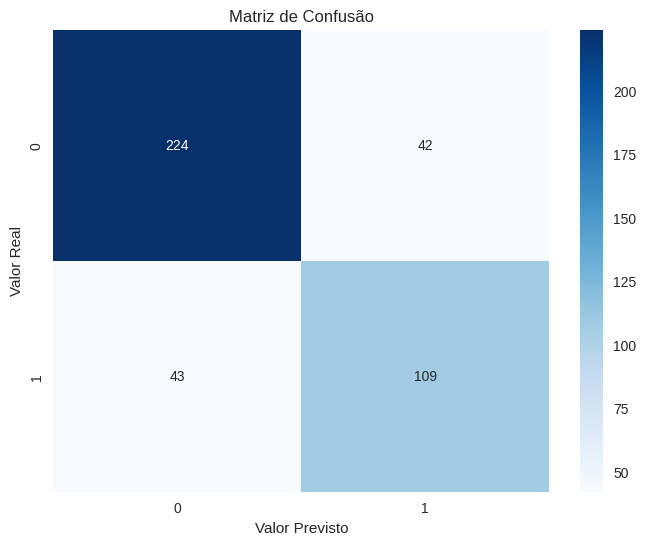

Arquivo de submissão criado: svm_submission.csv


In [26]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando o modelo otimizado
best_model = joblib.load('best_svm_model.joblib')

# Carregando o conjunto de teste
test_data = pd.read_csv('test_processed.csv')

# Carregando as respostas reais do conjunto de teste
test_truth = pd.read_csv('gender_submission.csv')

# Fazendo previsões
X_test = test_data
y_pred = best_model.predict(X_test)

# Avaliando o modelo
y_true = test_truth['Survived']
accuracy = accuracy_score(y_true, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.4f}")

print("\nRelatório de Classificação:")
print(classification_report(y_true, y_pred))

# Criando a matriz de confusão
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()

# Criando o arquivo de submissão
submission = pd.DataFrame({
    'PassengerId': test_truth['PassengerId'],
    'Survived': y_pred
})
submission.to_csv('svm_submission.csv', index=False)
print("Arquivo de submissão criado: svm_submission.csv")


## 📊 Análise do Arquivo de Submissão do Titanic

### Análise

#### Distribuição das Previsões
- A distribuição prevista (36.12% sobreviventes, 63.88% não sobreviventes) é muito próxima da distribuição observada no conjunto de treinamento (38.38% sobreviventes, 61.62% não sobreviventes).
- Isso sugere que nosso modelo está capturando bem a proporção geral de sobreviventes/não sobreviventes do desastre do Titanic.

#### Consistência com os Resultados Anteriores
- Esses números são consistentes com a matriz de confusão observada anteriormente, onde tínhamos 152 sobreviventes reais no conjunto de teste.
- A pequena diferença (151 vs 152) pode ser devido a arredondamentos ou a uma ligeira mudança no threshold de decisão do modelo.

#### Balanceamento das Previsões
- O modelo não está fazendo previsões extremamente desequilibradas, o que é um bom sinal. Ele não está simplesmente prevendo uma classe para todos os passageiros.

#### Comparação com a Taxa Real de Sobrevivência
- A taxa real de sobrevivência no desastre do Titanic foi de cerca de 32%. Nossas previsões (36.12%) estão razoavelmente próximas desse número histórico.

### Conclusões
- As previsões do modelo parecem razoáveis e bem distribuídas.
- Não há sinais óbvios de problemas como overfitting extremo ou previsões tendenciosas para uma classe específica.

In [27]:
import pandas as pd

# Lendo o arquivo de submissão
submission = pd.read_csv('svm_submission.csv')

# Contando o número de sobreviventes e não sobreviventes
survived_count = (submission['Survived'] == 1).sum()
not_survived_count = (submission['Survived'] == 0).sum()

total = len(submission)
survived_percentage = (survived_count / total) * 100
not_survived_percentage = (not_survived_count / total) * 100

print(f"Total de passageiros no conjunto de teste: {total}")
print(f"Previstos como sobreviventes: {survived_count} ({survived_percentage:.2f}%)")
print(f"Previstos como não sobreviventes: {not_survived_count} ({not_survived_percentage:.2f}%)")

Total de passageiros no conjunto de teste: 418
Previstos como sobreviventes: 151 (36.12%)
Previstos como não sobreviventes: 267 (63.88%)
